In [145]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time

In [16]:
def get_odds():
    url = "https://odds.p.rapidapi.com/v1/odds"

    querystring = {"sport":"americanfootball_nfl","region":"us","mkt":"h2h","dateFormat":"iso","oddsFormat":"decimal"}

    headers = {
        'x-rapidapi-key': "950d6f46c7mshd207314ef9e55b3p13a24ejsn2773fa5b78fd",
        'x-rapidapi-host': "odds.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()['data']

In [17]:
odds = get_odds()

Odds that look like 1.21/4.7 represents odds 2/9 7/2.

So if Chicago Bears are 1.2 that means they are listed as 2/9. 1.2 is the payout multiplier

Betting 10 will payout 12. The original 10 + 2 profit.

In [168]:
matchups = [o['teams'] for o in odds]

In [18]:
print(odds[0]['teams'])
for s in odds[0]['sites']:
    print(s['site_key'], s['odds'])

['Chicago Bears', 'Jacksonville Jaguars']
betonlineag {'h2h': [1.21, 4.7]}
fanduel {'h2h': [1.23, 4.4]}
lowvig {'h2h': [1.22, 4.7]}
williamhill_us {'h2h': [1.22, 4.7]}
bookmaker {'h2h': [1.22, 4.52]}
caesars {'h2h': [1.23, 4.5]}
betfair {'h2h': [1.25, 4.9], 'h2h_lay': [1.26, 5.0]}
unibet {'h2h': [1.24, 4.4]}
sugarhouse {'h2h': [1.24, 4.4]}
betrivers {'h2h': [1.24, 4.4]}
draftkings {'h2h': [1.24, 4.4]}
gtbets {'h2h': [1.22, 4.5]}
betmgm {'h2h': [1.22, 4.5]}
mybookieag {'h2h': [1.22, 4.55]}
bovada {'h2h': [1.2, 4.5]}
pointsbetus {'h2h': [1.22, 4.4]}
intertops {'h2h': [1.22, 4.5]}


In [134]:
for game in odds:
    print(game['teams'])

['Chicago Bears', 'Jacksonville Jaguars']
['Atlanta Falcons', 'Kansas City Chiefs']
['Baltimore Ravens', 'New York Giants']
['Cleveland Browns', 'New York Jets']
['Cincinnati Bengals', 'Houston Texans']
['Indianapolis Colts', 'Pittsburgh Steelers']
['Denver Broncos', 'Los Angeles Chargers']
['Carolina Panthers', 'Washington Football Team']
['Los Angeles Rams', 'Seattle Seahawks']
['Dallas Cowboys', 'Philadelphia Eagles']
['Green Bay Packers', 'Tennessee Titans']
['Buffalo Bills', 'New England Patriots']


Will watch fanduel and draft kings today

In [74]:
def odds_to_frame(odds):
    frames = []
    for game in odds:
        for i, team in enumerate(game['teams']):
            for site in game['sites']:
                frame = {
                    'team': team,
                    'site': site['site_key'],
                    'odds': site['odds']['h2h'][i],
                    'time': datetime.now()
                }
                frames.append(frame)
    df = pd.DataFrame(frames)
    df = df.set_index('time')
    return df

In [75]:
df = odds_to_frame(odds)

In [56]:
df[df['team'].isin(['Chicago Bears', 'Jacksonville Jaguars'])].groupby('team').mean()

,odds
team,
Chicago Bears,1.225882
Jacksonville Jaguars,4.527647


In [72]:
def avg_odds():
    df = odds_to_frame(get_odds())
    avg = df[df['site'].isin(['fanduel', 'draftkings'])].groupby('team').mean()
    avg['time'] = datetime.now()
    avg['team'] = avg.index
    avg = avg.set_index('time')
    return avg

avg_odds().head()

,odds,team
time,,
2020-12-27 12:58:36.561108,5.100,Atlanta Falcons
2020-12-27 12:58:36.561108,1.240,Baltimore Ravens
2020-12-27 12:58:36.561108,1.320,Buffalo Bills
2020-12-27 12:58:36.561108,1.855,Carolina Panthers
2020-12-27 12:58:36.561108,1.215,Chicago Bears


In [78]:
def latest():
    return odds_to_frame(get_odds())

In [80]:
df = pd.DataFrame()

                      odds                
team      Baltimore Ravens New York Giants
time time                                 
13   35              1.020            14.0
     38              1.015            14.5
     40              1.015            14.5
     42              1.010            19.0
     44              1.010            19.0


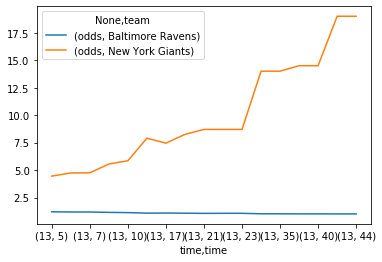

In [151]:
df = pd.concat([df, latest()])
def game_info(df, teams):
    sites = df['site'].isin(['fanduel', 'draftkings'])
    teams = df['team'].isin(teams)
    df = df[sites & teams]
    return df.groupby([df.index.hour, df.index.minute, 'team']).mean().unstack()
    
info = game_info(df, ['Baltimore Ravens', 'New York Giants'])
info.plot()
print(info.tail())
df.to_csv('2020-12-27.csv')

In [156]:
# while True:
#     print('Running at: ', datetime.now())
#     df = pd.concat([df, latest()])
#     info = game_info(df, ['Baltimore Ravens', 'New York Giants'])
#     info.plot()
#     df.to_csv('2020-12-27.csv')
#     time.sleep(60 * 5)

In [172]:
def final_results(df, matchup):
    info = game_info(df, matchup)
    info.plot(grid=True)
    print(info)

                   odds                     
team      Chicago Bears Jacksonville Jaguars
time time                                   
13   5           1.2300               4.1500
     6           1.2575               3.9250
     7           1.2900               3.6000
     8           1.3550               3.2250
     10          1.2900               3.5750
     13          1.2900               3.6000
     17          1.2525               3.9375
     19          1.2200               4.3875
     21          1.1650               5.1500
     22          1.1550               5.4500
     23          1.1550               5.4500
     31          1.0750               8.2500
     35          1.0575               9.4250
     38          1.0500              10.1500
     40          1.0800               8.0500
     42          1.0800               7.7500
     44          1.0950               7.2000
     45          1.1050               6.8500
     50          1.1450               5.6000
     55   

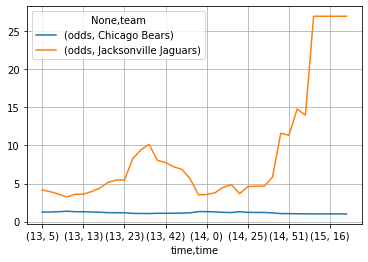

In [173]:
final_results(df, matchups[0])

At 13:38 Bet 10 on Jaguars with odds 10.0 Expected Value: 100

At 14:00 Bet 50 on Bears with odds 1.3 (hedge) Expected Value: 65

If jaguars win, take home 100 - 50 = 50

If bears win, take home 65 - 10 = 55

                     odds                   
team      Atlanta Falcons Kansas City Chiefs
time time                                   
13   5             4.9250             1.1750
     6             4.9000             1.1750
     7             4.9000             1.1750
     8             4.9000             1.1750
     10            5.3500             1.1500
     13            5.9000             1.1250
     17            4.7000             1.1875
     19            4.3250             1.2125
     21            4.2000             1.2200
     22            4.2000             1.2250
     23            4.2000             1.2250
     31            4.8500             1.1750
     35            4.8500             1.1800
     38            6.0250             1.1250
     40            5.7000             1.1350
     42            5.3000             1.1550
     44            6.1500             1.1150
     45            6.2125             1.1175
     50            5.2500             1.1500
     55   

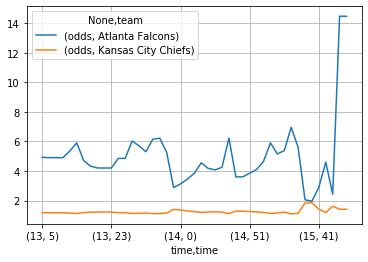

In [174]:
final_results(df, matchups[1])

At 13:38 Bet 10 on Falcons with odds 6.0

At 13:55 Bet 25 on Chiefs with odds 1.4

Falcons win, profit 35 (60 - 25 hedge)

Chiefs win, break even

                      odds                
team      Baltimore Ravens New York Giants
time time                                 
13   5               1.205          4.4500
     6               1.185          4.7375
     7               1.185          4.7500
     8               1.150          5.5500
     10              1.130          5.8500
     13              1.080          7.9000
     17              1.090          7.4500
     19              1.075          8.2500
     21              1.060          8.7000
     22              1.065          8.7000
     23              1.065          8.7000
     31              1.020         14.0000
     35              1.020         14.0000
     38              1.015         14.5000
     40              1.015         14.5000
     42              1.010         19.0000
     44              1.010         19.0000
     45              1.020         17.0000
     50              1.010         23.0000
     55              1.010         19.0000
14   0     

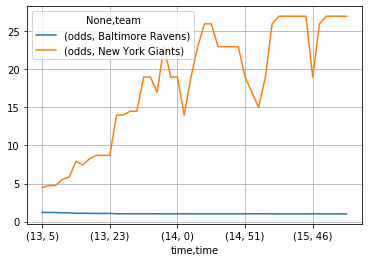

In [176]:
final_results(df, matchups[2])

In [183]:
datetime.

ValueError: Invalid isoformat string: '2020-12-29T01:15:00Z'

In [ ]:
datetime"2020-12-29T01:15:00Z"

In [191]:
datetime.strptime("2020-12-29T01:15:00Z", "%Y-%m-%dT%H:%M:%SZ")

datetime.datetime(2020, 12, 29, 1, 15)

In [192]:
df.head()

,team,site,odds
time,,,
2020-12-27 13:05:19.581906,Chicago Bears,betonlineag,1.21
2020-12-27 13:05:19.581915,Chicago Bears,fanduel,1.26
2020-12-27 13:05:19.581917,Chicago Bears,lowvig,1.22
2020-12-27 13:05:19.581919,Chicago Bears,williamhill_us,1.20
2020-12-27 13:05:19.581920,Chicago Bears,bookmaker,1.22


In [193]:
d = datetime.now()

In [195]:
df["2020-12-27":]

,team,site,odds
time,,,
2020-12-27 13:05:19.581906,Chicago Bears,betonlineag,1.21
2020-12-27 13:05:19.581915,Chicago Bears,fanduel,1.26
2020-12-27 13:05:19.581917,Chicago Bears,lowvig,1.22
2020-12-27 13:05:19.581919,Chicago Bears,williamhill_us,1.20
2020-12-27 13:05:19.581920,Chicago Bears,bookmaker,1.22
...,...,...,...
2020-12-27 17:01:28.728781,New England Patriots,mybookieag,3.70
2020-12-27 17:01:28.728782,New England Patriots,betmgm,3.70
2020-12-27 17:01:28.728784,New England Patriots,pointsbetus,3.50


In [201]:
" ".join(["a", "b"])

'a b'

In [212]:
df.groupby([df.index.hour, df.index.minute, 'team']).mean().unstack().index.rename(['hour', 'minute'])

MultiIndex([(13,  5),
            (13,  6),
            (13,  7),
            (13,  8),
            (13, 10),
            (13, 13),
            (13, 17),
            (13, 19),
            (13, 21),
            (13, 22),
            (13, 23),
            (13, 31),
            (13, 35),
            (13, 38),
            (13, 40),
            (13, 42),
            (13, 44),
            (13, 45),
            (13, 50),
            (13, 55),
            (14,  0),
            (14,  5),
            (14, 10),
            (14, 15),
            (14, 20),
            (14, 25),
            (14, 30),
            (14, 35),
            (14, 40),
            (14, 45),
            (14, 51),
            (14, 56),
            (15,  1),
            (15,  6),
            (15, 11),
            (15, 16),
            (15, 21),
            (15, 26),
            (15, 31),
            (15, 36),
            (15, 41),
            (15, 46),
            (15, 51),
            (15, 56),
            (16,  1),
          

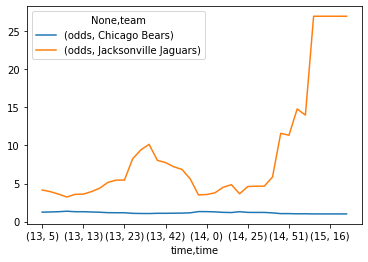

In [217]:
ax = info.plot()

In [219]:
ax.get_figure

<bound method Artist.get_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x7ffd68668b38>>

In [220]:
info.head()

odds                     
team      Chicago Bears Jacksonville Jaguars
time time                                   
13   5           1.2300                4.150
     6           1.2575                3.925
     7           1.2900                3.600
     8           1.3550                3.225
     10          1.2900                3.575

In [221]:
import seaborn as sns

In [233]:
info = game_info(df, ['Baltimore Ravens', 'New York Giants'])
info.index.rename(['hour', 'minute'], inplace=True)
info.head()

odds                
team        Baltimore Ravens New York Giants
hour minute                                 
13   5                 1.205          4.4500
     6                 1.185          4.7375
     7                 1.185          4.7500
     8                 1.150          5.5500
     10                1.130          5.8500

In [248]:
info['odds']['Baltimore Ravens']

hour  minute
13    5         1.205
      6         1.185
      7         1.185
      8         1.150
      10        1.130
      13        1.080
      17        1.090
      19        1.075
      21        1.060
      22        1.065
      23        1.065
      31        1.020
      35        1.020
      38        1.015
      40        1.015
      42        1.010
      44        1.010
      45        1.020
      50        1.010
      55        1.010
14    0         1.010
      5         1.020
      10        1.010
      15        1.010
      20        1.010
      25        1.010
      30        1.010
      35        1.010
      40        1.010
      45        1.010
      51        1.010
      56        1.020
15    1         1.020
      6         1.010
      11        1.010
      21        1.000
      26        1.000
      31        1.000
      36        1.000
      41        1.000
      46        1.010
      51        1.010
      56        1.000
16    1         1.000
      6         1.0

In [268]:
import altair as alt
info['odds'].reset_index().head()

team,hour,minute,Baltimore Ravens,New York Giants
0,13,5,1.205,4.4500
1,13,6,1.185,4.7375
2,13,7,1.185,4.7500
3,13,8,1.150,5.5500
4,13,10,1.130,5.8500


In [271]:
alt.Chart(info['odds'].reset_index()).mark_line().encode(x='minute', y='Baltimore Ravens')

alt.Chart(...)

In [276]:
from bokeh.plotting import figure, show 
from bokeh.io import bokeh_notebook

ImportError: cannot import name 'bokeh_notebook' from 'bokeh.io' (/Users/david/anaconda3/lib/python3.7/site-packages/bokeh/io/__init__.py)

In [273]:
graph = figure(title = "Bokeh Multi Line Graph")  

In [275]:
xs = ["%s:%02d" % item for item in info.index.tolist()]
ys = info['odds']
    
# plotting the graph  
graph.multi_line(xs, ys)

GlyphRenderer(id='1110', ...)

In [288]:
info['odds']['Baltimore Ravens']

hour  minute
13    5         1.205
      6         1.185
      7         1.185
      8         1.150
      10        1.130
      13        1.080
      17        1.090
      19        1.075
      21        1.060
      22        1.065
      23        1.065
      31        1.020
      35        1.020
      38        1.015
      40        1.015
      42        1.010
      44        1.010
      45        1.020
      50        1.010
      55        1.010
14    0         1.010
      5         1.020
      10        1.010
      15        1.010
      20        1.010
      25        1.010
      30        1.010
      35        1.010
      40        1.010
      45        1.010
      51        1.010
      56        1.020
15    1         1.020
      6         1.010
      11        1.010
      21        1.000
      26        1.000
      31        1.000
      36        1.000
      41        1.000
      46        1.010
      51        1.010
      56        1.000
16    1         1.000
      6         1.0

In [289]:
d = datetime.now()

In [291]:
d.timestamp()

1609213672.541249

In [295]:
df['team'].unique().tolist()

['Chicago Bears',
 'Jacksonville Jaguars',
 'Atlanta Falcons',
 'Kansas City Chiefs',
 'Baltimore Ravens',
 'New York Giants',
 'Cincinnati Bengals',
 'Houston Texans',
 'Indianapolis Colts',
 'Pittsburgh Steelers',
 'Cleveland Browns',
 'New York Jets',
 'Denver Broncos',
 'Los Angeles Chargers',
 'Carolina Panthers',
 'Washington Football Team',
 'Los Angeles Rams',
 'Seattle Seahawks',
 'Dallas Cowboys',
 'Philadelphia Eagles',
 'Green Bay Packers',
 'Tennessee Titans',
 'Buffalo Bills',
 'New England Patriots']